In [1]:
import keras
print(keras.__version__)

2.5.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense,Input,Embedding,LSTM
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Activation,Flatten

## 整体流程
![Aaron Swartz](https://github.com/Jacky-Zu/learn-keras/raw/main/flow.png)


## 构建网络

In [3]:
model = Sequential()

In [4]:
model.add(Dense(units=784,activation='relu',input_dim=784))
# 784输入，784输出，激活函数使用relu

In [5]:
model.add(Dense(units=10,activation='softmax'))
# 在此基础上为model添加10个输出的输出层，激活函数使用softmax

In [6]:
model.summary()  # 通过.summary()查看模型参数情况

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## 编译模型

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# 代价函数，优化算法，性能指标

## 训练

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


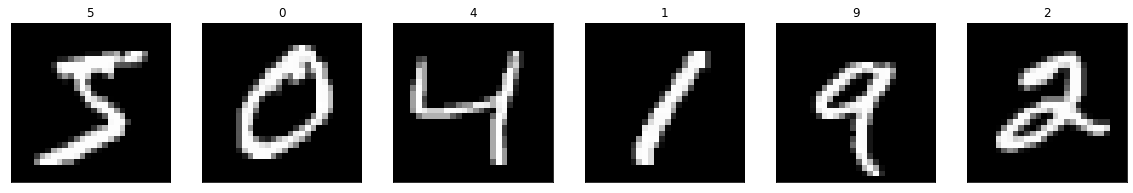

In [8]:
f = np.load('mnist.npz')
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# 可视化
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap= 'gray')
    ax.set_title(str(y_train[i]))

# 归一化
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
model.fit(x_train,y_train,epochs=5,batch_size=32) # 训练

Epoch 1/5
1875/1875 [==============================] - 27s 5ms/step - loss: 0.9530 - accuracy: 0.7723
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3283 - accuracy: 0.9092
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2758 - accuracy: 0.9232
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2408 - accuracy: 0.9329
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2170 - accuracy: 0.9403


In [11]:
score = model.evaluate(x_test,y_test,batch_size=128)  # 评价
print("loss：",score[0])
print("accu：",score[1])

79/79 [==============================] - 1s 4ms/step - loss: 0.2023 - accuracy: 0.9422
loss： 0.20233261585235596
accu： 0.9422000050544739


## 预测

In [13]:
np.argmax(model.predict(x_test,batch_size=128), axis=-1)  # 预测

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)